<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Load-iModulon-categories" data-toc-modified-id="Load-iModulon-categories-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load iModulon categories</a></span></li></ul></li><li><span><a href="#Supplementary-Figure-1---Variance-in-uncharacterized-iModulons" data-toc-modified-id="Supplementary-Figure-1---Variance-in-uncharacterized-iModulons-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Supplementary Figure 1 - Variance in uncharacterized iModulons</a></span><ul class="toc-item"><li><span><a href="#Statistical-analysis" data-toc-modified-id="Statistical-analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Statistical analysis</a></span></li></ul></li><li><span><a href="#Supplementary-Figure-2:-iModulon-summation" data-toc-modified-id="Supplementary-Figure-2:-iModulon-summation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Supplementary Figure 2: iModulon summation</a></span></li><li><span><a href="#Supplementary-Figure-3---Full-RBH-graph" data-toc-modified-id="Supplementary-Figure-3---Full-RBH-graph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Supplementary Figure 3 - Full RBH graph</a></span></li><li><span><a href="#Supplementary-Figure-4---Shared-genomic-iModulon" data-toc-modified-id="Supplementary-Figure-4---Shared-genomic-iModulon-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Supplementary Figure 4 - Shared genomic iModulon</a></span></li><li><span><a href="#Supplementary-Figure-5---Complex-iModulon-Cluster" data-toc-modified-id="Supplementary-Figure-5---Complex-iModulon-Cluster-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Supplementary Figure 5 - Complex iModulon Cluster</a></span></li><li><span><a href="#Supplementary-Figure-6---RBH-of-PCA" data-toc-modified-id="Supplementary-Figure-6---RBH-of-PCA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Supplementary Figure 6 - RBH of PCA</a></span></li><li><span><a href="#Supplementary-Figures-7+8" data-toc-modified-id="Supplementary-Figures-7+8-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Supplementary Figures 7+8</a></span></li></ul></div>

# Setup

In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import os, sys
from itertools import combinations
import seaborn as sns
from scipy import stats
sys.path.append('../../scripts/')
from core import *

In [2]:
sns.set_style('ticks')

In [3]:
# Use custom stylesheet for figures
plt.style.use('custom')

## Load data

In [4]:
datasets = sorted([x for x in os.listdir(os.path.join(DATA_DIR,'iModulons'))
            if '.' not in x])

In [5]:
# Thresholds were obtained from sensitivity analysis
cutoffs = {'MA-1': 550,
 'MA-2': 600,
 'MA-3': 350,
 'RNAseq-1': 700,
 'RNAseq-2': 300,
 'combined': 400}

In [6]:
def load(dataset):
    # Define directories
    ds_dir = os.path.join(DATA_DIR,'iModulons',dataset)
    
    # Define files
    X_file = os.path.join(DATA_DIR,'processed_data',dataset+'.csv')
    M_file = os.path.join(ds_dir,'M.csv')
    A_file = os.path.join(ds_dir,'A.csv')
    metadata_file = os.path.join(DATA_DIR,'metadata',dataset+'_metadata.csv')
    
    return IcaData(M_file,A_file,X_file,metadata_file,cutoffs[dataset])

In [7]:
# Load datasets
objs = {}
for ds in tqdm(datasets):
    objs[ds] = load(ds)

In [8]:
from sklearn.metrics import r2_score
summary_table = pd.DataFrame(dtype=int)
for ds in datasets:
    summary_table.loc[ds,'Samples'] = len(objs[ds].metadata)
    summary_table.loc[ds,'Conditions'] = len(objs[ds].metadata[['project_id','condition_id']].drop_duplicates())
    summary_table.loc[ds,'I-modulons'] = len(objs[ds].A.index)
summary_table

,Samples,Conditions,I-modulons
MA-1,260.0,115.0,103.0
MA-2,124.0,39.0,58.0
MA-3,56.0,20.0,32.0
RNAseq-1,278.0,163.0,91.0
RNAseq-2,84.0,28.0,52.0
combined,802.0,365.0,181.0


## Load iModulon categories

In [9]:
DF_categories = pd.read_csv('../../data/iModulons/categories_curated.csv',index_col=0)
DF_categories.index = DF_categories.dataset.str.cat(DF_categories.component.astype(str),sep='_')
DF_categories.head()

,dataset,curated,component,type,description,pvalue,qvalue,precision,recall,f1score,TP,LFC
dataset,,,,,,,,,,,,
MA-1_0,MA-1,1.0,0,functional,tricarboxylic acid cycle,1.024288e-10,3.409853e-07,0.500000,0.333333,0.400000,5.0,NaN
MA-1_1,MA-1,NaN,1,regulatory,fnr,2.368387e-19,5.707813e-17,0.538462,0.100358,0.169184,28.0,NaN
MA-1_2,MA-1,NaN,2,uncharacterized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MA-1_3,MA-1,NaN,3,regulatory,L-tryptophan,2.055994e-09,4.954947e-07,0.500000,1.000000,0.666667,3.0,NaN
MA-1_4,MA-1,NaN,4,genomic,b1609,1.251329e-04,2.148116e-03,NaN,NaN,NaN,NaN,-4.490995


# Supplementary Figure 1 - Variance in uncharacterized iModulons

In [10]:
for i,row in tqdm(DF_categories.iterrows(),total=len(DF_categories)):
    a = objs[row.dataset].A
    centered_samps = pd.Series(index=a.columns,dtype=np.float64)
    for name,group in objs[row.dataset].metadata.groupby(['project_id','condition_id']):
        centered_samps.loc[group.index] = a.loc[row.component,group.index] - a.loc[row.component,group.index].mean()
        DF_categories.loc[i,'centered_std'] = centered_samps.std()
        DF_categories.loc[i,'real_std'] = a.loc[row.component].std()

In [11]:
# Compute ratio between STD within replicates compared to STD across entire dataset
DF_categories.loc[:,'WG_BG_ratio'] = (DF_categories.centered_std/DF_categories.real_std)

In [12]:
rnaseq_cats = DF_categories[DF_categories.dataset.isin(['RNAseq-1','RNAseq-2'])].sort_values('type')
ma_cats = DF_categories[DF_categories.dataset.isin(['MA-1','MA-2','MA-3'])].sort_values('type')

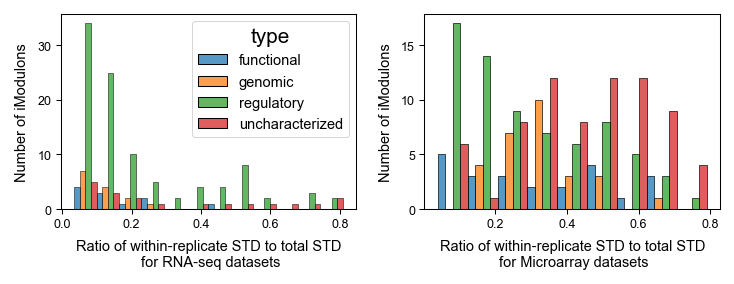

In [13]:
fig,ax = plt.subplots(1,2,figsize=(5,2))
sns.histplot(data=rnaseq_cats,x='WG_BG_ratio',hue='type',
             multiple='dodge',ax=ax[0])
sns.histplot(data=ma_cats,x='WG_BG_ratio',hue='type',
             multiple='dodge',ax=ax[1],legend=False)

ax[0].set_xlabel('Ratio of within-replicate STD to total STD\n for RNA-seq datasets')
ax[0].set_ylabel('Number of iModulons')

ax[1].set_xlabel('Ratio of within-replicate STD to total STD\n for Microarray datasets')
ax[1].set_ylabel('Number of iModulons')

plt.tight_layout()

## Statistical analysis

In [14]:
# Student's t-test comparing variance of characterized vs uncharacterized iModulons
char = DF_categories[DF_categories.type.isin(['biological','regulatory','genomic'])]
unchar = DF_categories[DF_categories.type=='uncharacterized']
stats.ttest_ind(char.WG_BG_ratio,unchar.WG_BG_ratio)

Ttest_indResult(statistic=-8.40773458379804, pvalue=5.311619445486932e-16)

# Supplementary Figure 2: iModulon summation

In [15]:
from sklearn.linear_model import LinearRegression
from collections import Counter

In [16]:
complist = {}
for k in objs['MA-3'].M.columns:
    # Fit linear model
    lm = LinearRegression(fit_intercept=False)
    lm.fit(objs['RNAseq-1'].M,objs['MA-3'].M[k])
    
    # Get components with coefficients > 0.15
    comps = objs['RNAseq-1'].M.columns[abs(lm.coef_) > 0.15].tolist()
    if len(comps) > 1:
        complist[k] = comps

In [17]:
complist

{4: [9, 37, 49],
 6: [17, 24, 46, 54, 73, 77, 87],
 9: [26, 65],
 10: [20, 37, 69, 74],
 12: [4, 57, 69, 75, 82],
 13: [8, 22, 62],
 15: [10, 58],
 19: [37, 63],
 21: [6, 10, 27, 68, 76],
 22: [75, 79],
 25: [17, 24],
 26: [41, 49],
 27: [19, 33, 62, 78],
 29: [33, 37],
 30: [22, 74, 75, 82],
 31: [59, 69]}

In [18]:
DF_categories[DF_categories.component == 10]

,dataset,curated,component,type,description,pvalue,qvalue,precision,recall,f1score,TP,LFC,centered_std,real_std,WG_BG_ratio
dataset,,,,,,,,,,,,,,,
MA-1_10,MA-1,1.0,10,functional,NADH dehydrogenase complex,9.198794e-21,3.062279e-17,0.416667,0.714286,0.526316,10.0,NaN,0.613251,4.155884,0.147562
MA-2_10,MA-2,NaN,10,regulatory,gadX,2.821643e-30,6.800160e-28,1.000000,0.481481,0.650000,13.0,NaN,1.700254,6.279544,0.270761
MA-3_10,MA-3,NaN,10,regulatory,arcA,2.676395e-50,6.450112e-48,0.429577,0.376543,0.401316,61.0,NaN,0.620097,9.856332,0.062914
RNAseq-1_10,RNAseq-1,NaN,10,regulatory,malT,1.101936e-19,2.655667e-17,0.875000,0.777778,0.823529,7.0,NaN,0.684092,5.615074,0.121831
RNAseq-2_10,RNAseq-2,NaN,10,regulatory,cbl,6.843546e-16,1.649295e-13,0.545455,0.857143,0.666667,6.0,NaN,1.043867,6.180351,0.168901
combined_10,combined,NaN,10,regulatory,fur,3.329838e-49,8.024910e-47,0.813953,0.315315,0.454545,35.0,NaN,1.268968,6.427920,0.197415


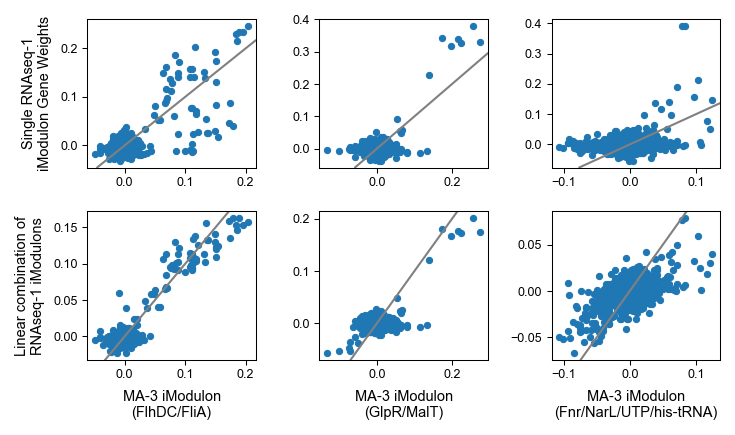

In [19]:
fig,ax = plt.subplots(2,3,figsize=(5,3))
i = 0
for k in [9,15,12]:
    lm = LinearRegression(fit_intercept=False)
    lm.fit(objs['RNAseq-1'].M[complist[k]],objs['MA-3'].M[k])
    top_hit = complist[k][np.argmax(lm.coef_)]
    ax[0,i].scatter(objs['MA-3'].M[k],objs['RNAseq-1'].M[top_hit])
    ax[1,i].scatter(objs['MA-3'].M[k],lm.predict(objs['RNAseq-1'].M[complist[k]]))
    i+=1
    
for axis in ax.flatten():
    xmin,xmax = axis.get_xlim()
    ymin,ymax = axis.get_ylim()
    allmin = max(xmin,ymin)
    allmax = min(xmax,ymax)
    axis.plot([allmin,allmax],[allmin,allmax],color='gray')
    axis.set_xlim([xmin,xmax])
    axis.set_ylim([ymin,ymax])

ax[0,0].set_ylabel('Single RNAseq-1\niModulon Gene Weights')
ax[1,0].set_ylabel('Linear combination of\nRNAseq-1 iModulons')

ax[1,0].set_xlabel('MA-3 iModulon\n(FlhDC/FliA)')
ax[1,1].set_xlabel('MA-3 iModulon\n(GlpR/MalT)')
ax[1,2].set_xlabel('MA-3 iModulon\n(Fnr/NarL/UTP/his-tRNA)')

plt.tight_layout()

# Supplementary Figure 3 - Full RBH graph

see Figure2_3 notebook

# Supplementary Figure 4 - Shared genomic iModulon

In [20]:
DF_links = pd.read_csv(os.path.join(DATA_DIR,'iModulons','rbh.csv'),index_col=0)

In [21]:
DF_links[DF_links.type2=='genomic']

,ds1,ds2,comp1,comp2,type1,desc1,type2,desc2,dist,ds1_code,ds2_code
89,MA-2,RNAseq-1,22,36,uncharacterized,NaN,genomic,b0759|b3548|b3549|b3550|b3551|b3552|b3553|b355...,0.57462,4,1


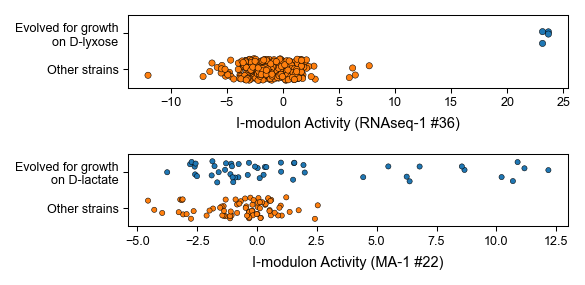

In [22]:
fig,ax = plt.subplots(2,1,figsize=(4,2))
df_box1 = pd.DataFrame(objs['RNAseq-1'].A.loc[36])
df_box1['cat'] = ['Evolved for growth\non D-lyxose' if x > 15 else 'Other strains' for x in df_box1[36]]
df_box2 = pd.DataFrame(objs['MA-2'].A.loc[22])
df_box2['cat'] = ['Evolved for growth\non D-lactate' if 'lac' in x else 'Other strains' for x in df_box2.index]

sns.stripplot(data=df_box1,y='cat',x=36,ax=ax[0],jitter=0.3,size=3,edgecolor='k',linewidth=.25,
            order=['Evolved for growth\non D-lyxose','Other strains'])


sns.stripplot(data=df_box2,y='cat',x=22,ax=ax[1],jitter=0.3,size=2.5,edgecolor='k',linewidth=.25,
            order=['Evolved for growth\non D-lactate','Other strains'])


ax[0].set_xlabel('I-modulon Activity (RNAseq-1 #36)')
ax[0].set_ylabel('')
ax[1].set_xlabel('I-modulon Activity (MA-1 #22)')
ax[1].set_ylabel('')

plt.tight_layout()

In [23]:
thresh1 = objs['RNAseq-1'].thresholds[36]
thresh2 = objs['MA-2'].thresholds[22]
dup_start = 3712114
dup_end = 3844639
dup_width = dup_end-dup_start

In [24]:
from matplotlib.patches import Rectangle

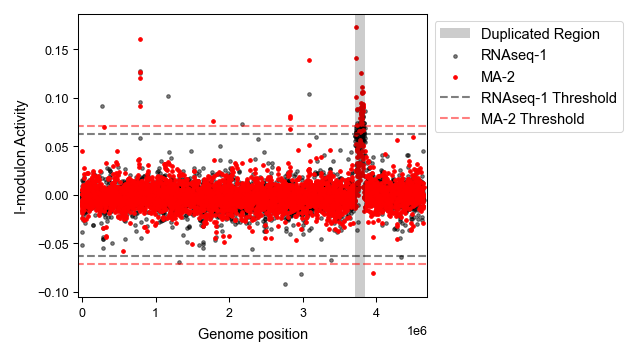

In [25]:
fig,ax = plt.subplots()

# Don't forget to move RNAseq-1 to the front
ax.scatter(gene_info['start'],objs['RNAseq-1'].M[36],s=3,color='k',alpha=0.5,label='RNAseq-1')
ax.scatter(gene_info['start'],objs['MA-2'].M[22],s=3,color='r',label='MA-2')
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# Draw thresholds
ax.hlines([thresh1,-thresh1],
          xlim[0],xlim[1],color='black',alpha=0.5,linestyle='dashed',label='RNAseq-1 Threshold')

ax.hlines([thresh2,-thresh2],
          xlim[0],xlim[1],color='red',alpha=0.5,linestyle='dashed',label='MA-2 Threshold')

# Draw duplication region
rect = Rectangle((dup_start,ylim[0]),dup_width,ylim[1]-ylim[0],
                 linewidth=0,facecolor='k',alpha=0.2,label='Duplicated Region')
ax.add_patch(rect)

ax.set_ylim(ylim)
ax.set_xlim([-50000,4640942+50000])
ax.set_xlabel('Genome position')
ax.set_ylabel('I-modulon Activity')
ax.legend(bbox_to_anchor=(1,1))

# Supplementary Figure 5 - Complex iModulon Cluster

In [26]:
fnr_genes = set(trn[trn.TF=='fnr'].gene_id)
narL_genes = set(trn[trn.TF=='narL'].gene_id)
arcA_genes = set(trn[trn.TF=='arcA'].gene_id)

In [27]:
from matplotlib_venn import venn3

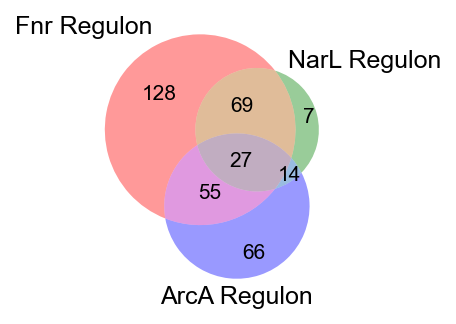

In [28]:
venn3((fnr_genes,narL_genes,arcA_genes),set_labels=('Fnr Regulon','NarL Regulon','ArcA Regulon'))

In [29]:
set1 = set(objs['RNAseq-1'].show_enriched(75).index)
set2 = set(objs['MA-2'].show_enriched(31).index)
set3 = set(objs['MA-3'].show_enriched(30).index)
set4 = set(objs['RNAseq-1'].show_enriched(22).index)

RNAseq-1 75
MA-2 31
RNAseq-1 75
MA-3 30
RNAseq-1 75
RNAseq-1 22
MA-2 31
MA-3 30
MA-2 31
RNAseq-1 22
MA-3 30
RNAseq-1 22


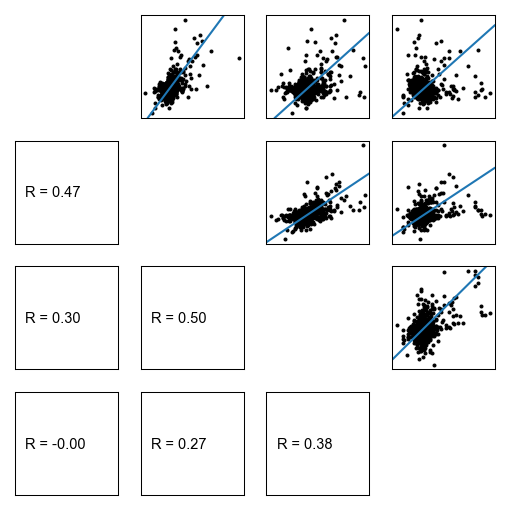

In [30]:
fig,ax = plt.subplots(4,4,figsize=(3.5,3.5))
weird_mods = [('RNAseq-1',75),('MA-2',31),('MA-3',30),('RNAseq-1',22)]
for i,j in combinations(range(4),2):
    ds1,k1 = weird_mods[i]
    ds2,k2 = weird_mods[j]
    print(ds1,k1)
    print(ds2,k2)
    r,p = stats.pearsonr(objs[ds1].M[k1],objs[ds2].M[k2])
    ax[i,j].scatter(objs[ds2].M[k2],objs[ds1].M[k1],s=2,color='k')
    ax[j,i].text(0.1,0.45,'R = {:.2f}'.format(r),fontsize=7)
    
    xmin,xmax = ax[i,j].get_xlim()
    ymin,ymax = ax[i,j].get_ylim()
    lim = [max(xmin,ymin),min(ymax,xmax)]
    ax[i,j].plot(lim,lim)
    
    ax[i,j].set_xlim(xmin,xmax)
    ax[i,j].set_ylim(ymin,ymax)
    ax[i,j].tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    ax[j,i].tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    ax[i,i].tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    ax[j,j].tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    ax[i,i].set_frame_on(False)
    ax[j,j].set_frame_on(False)

    
plt.tight_layout()

# Supplementary Figure 6 - RBH of PCA

In [31]:
from rbh import *
from sklearn.decomposition import PCA

In [32]:
def run_pca(ds):
    x = pd.read_csv(os.path.join(DATA_DIR,'processed_data/'+ds+'_bc.csv'),index_col=0)
    pca = PCA()
    DF_weights = pd.DataFrame(pca.fit_transform(x.T),index=x.columns)
    DF_components = pd.DataFrame(pca.components_.T,index=x.index)
    n_comp = sum(pca.explained_variance_ratio_.cumsum() < 0.99)
    return DF_weights.iloc[:n_comp],DF_components.iloc[:,:n_comp]

In [33]:
weight = {}
comp = {}
for ds in datasets[:-1]:
    w,c = run_pca(ds)
    comp[ds] = c
    weight[ds] = w

In [34]:
l2s = []
for ds1,ds2 in combinations(datasets[:-1],2):
    links = rbh(comp[ds1],comp[ds2])
    for i,j,val in links:
        if 1-val > 0.3:
            l2s.append([ds1,ds2,i,j,1-val])
df = pd.DataFrame(l2s,columns=['dataset1','dataset2','comp1','comp2','dist'])

../../scripts/rbh.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return np.dot(s1.T,s2)/np.sqrt((s1**2).sum())[:, np.newaxis]/np.sqrt((s2**2).sum())[np.newaxis,:]


In [35]:
# Initialize graph
from graphviz import Digraph
dot = Digraph(engine='dot',graph_attr={'splines':'false'})

# Set colors
ds_colors = {'RNAseq-1':'#f47f72','RNAseq-2':'#a6d854','MA-1':'#fcf6b5','MA-2':'#bc80b7','MA-3':'#81b1d3'}
cat_shapes = {'regulatory':'circle','functional':'triangle','genomic':'star','uncharacterized':'square'}

# Initialize nodes
nodes = []
node_cats = []
links = []
        
# Create edges
for i,ds1 in enumerate(datasets[:-1]):
    for j,ds2 in enumerate(datasets[i+1:-1]):
        edges = rbh(comp[ds1],comp[ds2])
        for comp1,comp2,dist in edges:
            node1 = ds1+'_'+str(comp1)
            node2 = ds2+'_'+str(comp2)
            if dist < .7:
                if node1 not in nodes:
                    dot.node(node1,shape='circle',label='',width='.2',
                             height='.2',
                             fillcolor=ds_colors[ds1],style='filled',
                             color='black',
                             penwidth='2')
                if node2 not in nodes:
                    dot.node(node2,shape='circle',label='',width='.2',
                             height='.2',
                             fillcolor=ds_colors[ds2],style='filled',
                             color='black',penwidth='2')
                if dist < .7:
                    dot.edge(node1,node2,_attributes={'arrowhead':'none','color':get_edge_color(dist),
                                                      'penwidth':'{:.2f}'.format(11*(1-dist))})

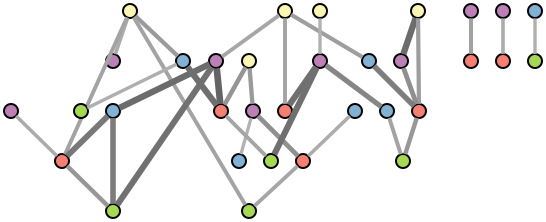

In [36]:
dot

# Supplementary Figures 7+8

See notebook for Figure 5